# Logistic Regression and Stochastic Gradient Descent

In [357]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from pylab import *
from sklearn.datasets import load_svmlight_file
import random

In [358]:
#read data
x_train,y_train = load_svmlight_file("a9a")
x_test,y_test = load_svmlight_file("a9a.t",n_features=123)
#if validation set needed
#x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.33) 

(n,m) = x_train.shape
print("The demensin of x_train dataset is:",(n,m))
print("The demensin of x_test dataset is:",x_test.shape)

The demensin of x_train dataset is: (32561, 123)
The demensin of x_test dataset is: (16281, 123)


In [359]:
#initialize data
#x_train = x_train.todense()
#x_test = x_test.todense()
#add constant term row
#x_train = np.hstack((np.ones((n,1)),x_train))
#x_test = np.hstack((np.ones((len(x_test),1)),x_test)) 
y_train = y_train.reshape((n,1))
y_test = y_test.reshape((len(y_test),1))

#if labels are {-1,1}
idx = np.where(y_train == -1)
y_train[idx] = 0
idx = np.where(y_test == -1)
y_test[idx] = 0

In [360]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

In [361]:
def rightRate(gd,pred):
    pred[pred>0.5] = 1
    pred[pred<=0.5] = 0
    right=np.count_nonzero(pred==gd)
    return right/len(gd)

In [301]:
def NAG(parameters, gradients, eta=0.0005, momentum=0.9):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    v = np.zeros(para_num)
    next_v = np.zeros(para_num)
    for i in range(para_num):
        next_v[i] = momentum * v[i] + eta * gradients[i,0] 
        updates[i,0] = parameters[i,0] - momentum * next_v[i] - eta * gradients[i,0]
    return updates

In [302]:
def RMSProp(parameters, gradients, eta=0.002, momentum=0.9, epsilon=1e-8):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    for i in range(para_num):
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        updates[i,0] = parameters[i,0] - eta * gradients[i,0] / np.sqrt(next_G[i] + epsilon)
    return updates

In [393]:
def AdaDelta(parameters, gradients, momentum=0.05, epsilon=1e-6):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    dx = np.zeros(para_num)
    next_dx = np.zeros(para_num)
    for i in range(para_num):
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        next_dx[i] = np.sqrt(dx[i] + epsilon) / np.sqrt(next_G[i] + epsilon)
        updates[i,0] =parameters[i,0] - next_dx[i] * gradients[i,0]
    return updates

In [304]:
def Adam(parameters, gradients, eta=0.002, momentum=0.999, beta=0.9, epsilon=1e-8):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    m = np.zeros(para_num)
    next_m = np.zeros(para_num)
    for i in range(para_num):
        next_m[i] = beta * m[i] + (1 - beta) * gradients[i,0] 
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        updates[i,0] = parameters[i,0] - eta * np.sqrt(1 - momentum) / (1 - beta) * next_m[i] / np.sqrt(next_G[i] + epsilon)
    return updates

In [373]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train_NAG = []
loss_test_NAG = []
MAX_LOOPS = 3000
batch_size = 128
cnt = 0
eta = 0.0005

#Mini-batch Stochastic Gradient Descent with NAG
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    h = sigmoid(x_train_batch*W)
    deltaW = x_train_batch.T*(h-y_train_batch)
    W = NAG(W,deltaW,eta)
    h = sigmoid(x_train*W)
    #loss_train.append(-1/n*sum(np.multiply(y_train,np.log(h))+np.multiply(1-y_train,1-np.log(h))))
    loss_train_NAG.append(-(1/x_train.shape[0])*(y_train*np.log(h)+(1-y_train)*np.log(1-h)).sum())
    h = sigmoid(x_test*W)
    loss_test_NAG.append(-(1/x_test.shape[0])*(y_test*np.log(h)+(1-y_test)*np.log(1-h)).sum())
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

y_test_pred = h

The accuracy: 0.8490264725753947


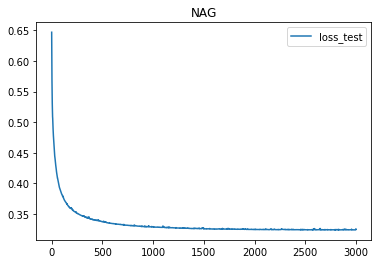

In [374]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_NAG[:],label='loss_test')
title("NAG")
legend()
plt.show()

In [371]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train_RMSProp = []
loss_test_RMSProp = []
MAX_LOOPS = 3000
batch_size = 128
cnt = 0
eta = 0.0002

#Mini-batch Stochastic Gradient Descent with RMSProp
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    h = sigmoid(x_train_batch*W)
    deltaW = x_train_batch.T*(h-y_train_batch)
    W = RMSProp(W,deltaW,eta)
    h = sigmoid(x_train*W)
    #loss_train.append(-1/n*sum(np.multiply(y_train,np.log(h))+np.multiply(1-y_train,1-np.log(h))))
    loss_train_RMSProp.append(-(1/x_train.shape[0])*(y_train*np.log(h)+(1-y_train)*np.log(1-h)).sum())
    h = sigmoid(x_test*W)
    loss_test_RMSProp.append(-(1/x_test.shape[0])*(y_test*np.log(h)+(1-y_test)*np.log(1-h)).sum())
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

y_test_pred = h

The accuracy: 0.8506234260794792


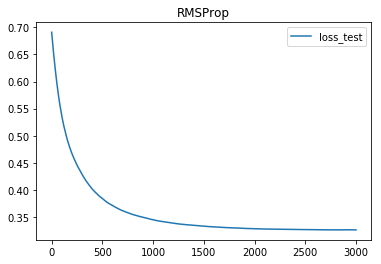

In [372]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_RMSProp[:],label='loss_test')
title("RMSProp")
legend()
plt.show()

In [384]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train_AdaDelta = []
loss_test_AdaDelta = []
MAX_LOOPS = 3000
batch_size = 128
cnt = 0

#Mini-batch Stochastic Gradient Descent with AdaDelta
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    h = sigmoid(x_train_batch*W)
    deltaW = x_train_batch.T*(h-y_train_batch)
    W = AdaDelta(W,deltaW)
    h = sigmoid(x_train*W)
    #loss_train.append(-1/n*sum(np.multiply(y_train,np.log(h))+np.multiply(1-y_train,1-np.log(h))))
    loss_train_AdaDelta.append(-(1/x_train.shape[0])*(y_train*np.log(h)+(1-y_train)*np.log(1-h)).sum())
    h = sigmoid(x_test*W)
    loss_test_AdaDelta.append(-(1/x_test.shape[0])*(y_test*np.log(h)+(1-y_test)*np.log(1-h)).sum())
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

y_test_pred = h

The accuracy: 0.8498863706160555


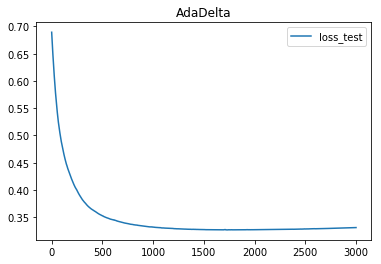

In [385]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_AdaDelta[:],label='loss_test')
title("AdaDelta")
legend()
plt.show()

In [394]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train_Adam = []
loss_test_Adam = []
MAX_LOOPS = 3000
batch_size = 128
cnt = 0
eta = 0.0005
C = 0.001

#Mini-batch Stochastic Gradient Descent
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    h = sigmoid(x_train_batch*W)
    deltaW = x_train_batch.T*(h-y_train_batch)
    W = Adam(W,deltaW,eta)
    h = sigmoid(x_train*W)
    #loss_train.append(-1/n*sum(np.multiply(y_train,np.log(h))+np.multiply(1-y_train,1-np.log(h))))
    loss_train_Adam.append(-(1/x_train.shape[0])*(y_train*np.log(h)+(1-y_train)*np.log(1-h)).sum())
    h = sigmoid(x_test*W)
    loss_test_Adam.append(-(1/x_test.shape[0])*(y_test*np.log(h)+(1-y_test)*np.log(1-h)).sum())
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

y_test_pred = h

The accuracy: 0.8500092131932928


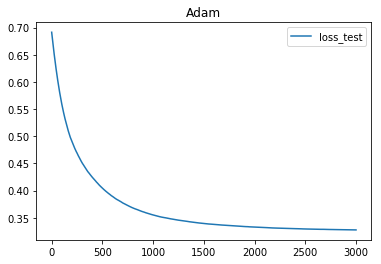

In [395]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_Adam[:],label='loss_test')
title("Adam")
legend()
plt.show()

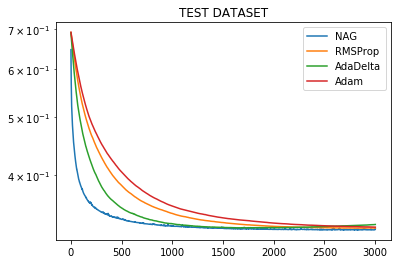

In [396]:
plt.yscale('log')
plot(loss_test_NAG,label='NAG')
plot(loss_test_RMSProp,label='RMSProp')
plot(loss_test_AdaDelta,label='AdaDelta')
plot(loss_test_Adam,label='Adam')
title("TEST DATASET")
legend()
plt.show()

In [ ]:
#end

In [ ]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train = []
loss_test = []
MAX_LOOPS = 1000
batch_size = 8
cnt = 0
learning_rate = 0.005
C = 0.001

#Mini-batch Stochastic Gradient Descent
#The Cross Entropy Error Measure
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    #y_train_pred_batch = x_train_batch*W; 
    deltaW = -learning_rate*C*W+learning_rate/n*sum(y_train_batch.T*x_train_batch/(1+np.exp(np.multiply(y_train_batch,x_train_batch*W))))
    print(((1+np.exp(np.multiply(y_train_batch,x_train_batch*W)))).shape)
    #print(learning_rate/n*sum(y_train_batch.T*x_train_batch/(1+np.exp(np.multiply(y_train_batch,x_train_batch*W)))))
    W = W+deltaW
    loss_train.append(C/2*np.linalg.norm(W)**2+1/n*sum(np.log1p(np.exp(np.multiply(-y_train,x_train*W)))))
    loss_test.append(C/2*np.linalg.norm(W)**2+1/n*sum(np.log1p(np.exp(np.multiply(-y_test,x_test*W)))))
    if loss_train[-1]< 0.01 or cnt>MAX_LOOPS:
        break
    cnt = cnt+1

(123, 1)
(16281, 1)
The number of samples in y_test: 16281
The accuracy: 0.8483508384005897


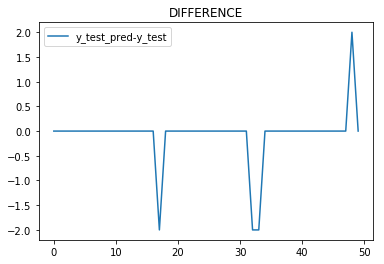

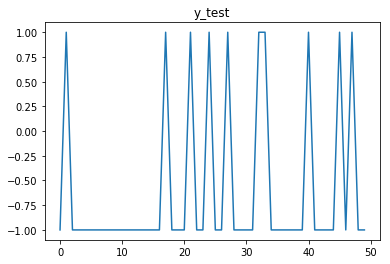

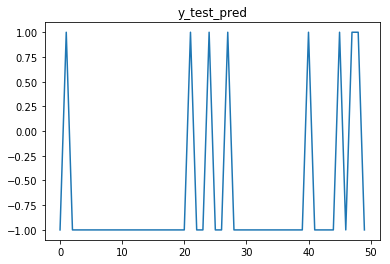

[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]]
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-2.]
 [-2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0

In [356]:
#test result plot
y_test_pred = 1/(1+np.exp(-x_test*W))
print(W.shape)
idx_1 = np.where(y_test_pred>=0.5)
idx_2 = np.where(y_test_pred<0.5)
y_test_pred[idx_1] = +1
y_test_pred[idx_2] = -1
diff = y_test_pred-y_test
print(diff.shape)
print("The number of samples in y_test:",y_test.shape[0])
right_percent = len(np.where(diff==0)[0])/len(diff)
print("The accuracy:",right_percent)
plot(diff[3000:3050],label='y_test_pred-y_test')
title("DIFFERENCE")
legend()
plt.show()

figure()
plot(y_test[3000:3050])
title("y_test")
plt.show()

figure()
plot(y_test_pred[3000:3050])
title("y_test_pred")
plt.show()

print(y_test[3000:3050])
print(y_test_pred[3000:3050])
print(diff[3000:3050])

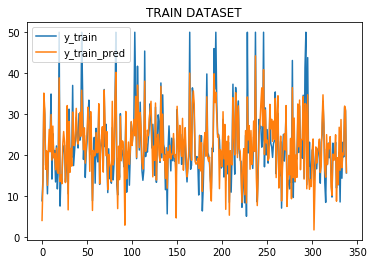

In [78]:
#train result plot
plot(y_train,label='y_train')
plot(y_train_pred,label='y_train_pred')
title("TRAIN DATASET")
legend()
plt.show()

In [181]:
m = x_train.shape[1]
W = np.zeros((m,1)) #weights
loss_train = []
loss_test = []
MAX_LOOPS = 1000
batch_size = 64
cnt = 0
learning_rate = 0.05
C = 0.00001

#Mini-batch Stochastic Gradient Descent
#The Cross Entropy Error Measure
y_train_pred_batch = []
while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    #y_train_pred_batch = x_train_batch*W; 
    deltaW = -learning_rate*C*W+learning_rate/n*sum(y_train_batch.T*x_train_batch/(1+np.exp(np.multiply(y_train_batch,x_train_batch*W))))
    #print(((1+np.exp(np.multiply(y_train_batch,x_train_batch*W)))).shape)
    #print(learning_rate/n*sum(y_train_batch.T*x_train_batch/(1+np.exp(np.multiply(y_train_batch,x_train_batch*W)))))
    W = W+deltaW

    loss_train.append(C/2*np.linalg.norm(W)**2+1/n*np.log1p(np.exp((-y_train.T*x_train*W)[0,0])))
    print(loss_train[-1])
    #loss_test.append(C/2*np.linalg.norm(W)**2+1/n*np.log1p(np.exp(-y_test.T*x_test*W)))
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

8.30850352057e-07
1.91835134737e-06
3.08168389686e-06
4.79416177132e-06
6.5888594955e-06
7.50772580209e-06
9.28428745977e-06
1.15589799588e-05
1.32749043017e-05
1.5937207883e-05
1.87238654764e-05
2.15761229898e-05
2.45471421603e-05
2.76530406963e-05
3.07213630016e-05
3.39448019528e-05
3.73328973941e-05
4.08771064207e-05
4.4583943017e-05
4.83624363466e-05
5.16721853301e-05
5.56528468583e-05
5.99185993614e-05
6.39278844018e-05
6.8340841416e-05
7.28654788358e-05
7.72924142479e-05
8.21438240824e-05
8.70015922529e-05
9.20800319733e-05
9.7235396303e-05
0.000102583747543
0.000108159327504
0.00011389421965
0.00011970496126
0.000125698498721
0.00013179393355
0.000136713821045
0.000142834791951
0.000149302995868
0.000153810051163
0.000160258889784
0.00016699985042
0.000174052854844
0.000181031128178
0.000188309655336
0.000194999987353
0.000202464725395
0.000208745617978
0.000215846472261
0.000223913181796
0.000232067934281
0.000240180816688
0.000248541976731
0.000256776695065
0.000265096928441
0

0.0169941410451
0.0170576371412
0.0171244009106
0.0171958989298
0.017262101841
0.0173324023605
0.0174026849479
0.0174602255877
0.0175304236735
0.017599560166
0.0176485200515
0.0177173615752
0.0177864691146
0.0178564031926
0.0179283610107
0.017999717556
0.0180715024638
0.0181335830153
0.0182016880921
0.0182712385163
0.0183392299842
0.0184056427482
0.0184789459457
0.0185496147002
0.0186235778497
0.0186958031693
0.0187656224233
0.0188352790941
0.0189029285468
0.0189743080155
0.0190386542071
0.0191105839694
0.019182079699
0.019256816029
0.0193264879554
0.0193915127291
0.0194655078099
0.0195312341008
0.0196050470632
0.019675473581
0.0197521271503
0.0198275569567
0.0199020774955
0.0199673520551
0.020038943085
0.0201122931337
0.0201776731197
0.0202534982686
0.0203293352714
0.0203870403793
0.0204641835132
0.0205405007903
0.0206151885018
0.0206918303189
0.0207685923484
0.020841076189
0.0209188853112
0.0209948087735
0.0210723733113
0.0211354847437
0.0212121103857
0.0212842520434
0.0213617810664
